In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import scipy.stats as stats
import sklearn.cluster as cluster
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
fruit1 = pd.read_csv('data/fruits_all/1-fruitRef.csv')
fruit1.head(2)

fruit  diameter      weight
0  Apple  6.600522  121.717213
1  Apple  7.180725  132.704194

In [3]:
def compute_and_plot_clusters(df,cluster_method,gt_col='fruit'):
    clusters = cluster_method.fit_predict(df[["weight","diameter"]])
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
    #plot side by side the original data and the clusters
    #fig, ax =plt.subplots(1,2)
    
    #normalize the data without the fruit column
    df_normalized = stats.zscore(df[["weight","diameter"]])
    
    clusters_normalized = cluster_method.fit_predict(df_normalized)

    sns.scatterplot(data=df, x="weight", y="diameter", hue=gt_col, ax=axes[0],palette='deep').set(title='Ground Truth')
    sns.scatterplot(data=df, x="weight", y="diameter", hue=clusters, ax=axes[1],palette='deep').set(title='Without Normalization')
    sns.scatterplot(data=df, x="weight", y="diameter", hue=clusters_normalized, ax=axes[2],palette='deep').set(title='With Normalization')

    

/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


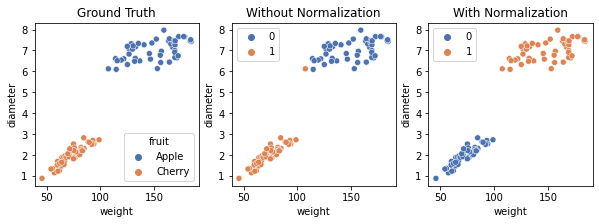

In [4]:
compute_and_plot_clusters(fruit1,cluster_method=cluster.KMeans(n_clusters=2))

## Analysis
On this first example, we see that normalization was able to solve the misclassified point
This misclassified point was due to the difference between the scale of weight and diameter: weight has much more importance

In [5]:
fruit2 = pd.read_csv('data/fruits_all/2-fruitDense.csv')
fruit2.head(2)

fruit  diameter      weight
0  Apple  7.363885  141.541817
1  Apple  6.608892  143.229432

/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


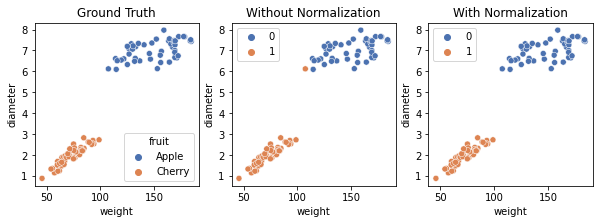

In [6]:
compute_and_plot_clusters(fruit1,cluster_method=cluster.KMeans(n_clusters=2))

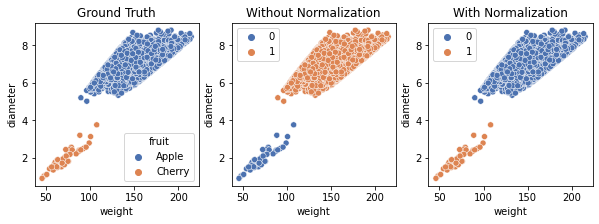

In [7]:
#Use gaussian mixture model to cluster the data
from sklearn.mixture import BayesianGaussianMixture
compute_and_plot_clusters(fruit2,cluster_method=BayesianGaussianMixture(n_components=2))

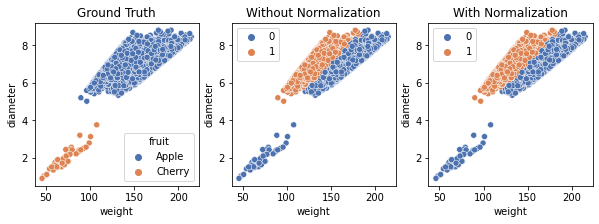

In [8]:
compute_and_plot_clusters(fruit2,cluster_method=BayesianGaussianMixture(n_components=2,covariance_type='tied'))

## Analysis
We observe that using k-means, the results are not as expected. This is due to one class having much more elements than another. Normalization cannot solve that problem. Using Gaussian Mixture however, with a free-enough covariance type, we find the expected clusters

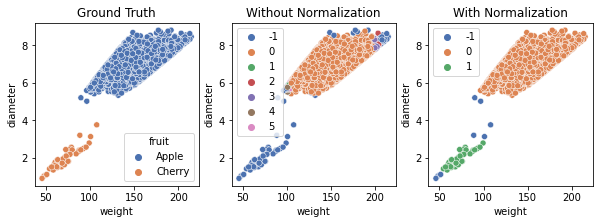

In [9]:
from sklearn.cluster import DBSCAN
compute_and_plot_clusters(fruit2,cluster_method=DBSCAN(eps=0.5,min_samples=5))

Choosing an appropriate epsilon and min_smaples parameter, we also get the expected result with DBscan. Note -1 corresponding to "noise/unclassified" data points.
Of course, the right choice of parameters with normalization is not really appropriate without, and vice-versa

In [10]:
fruit3 = pd.read_csv('data/fruits_all/3-fruitPassion.csv')
fruit3.head(2)

fruit  diameter    weight
0  PassionFruit  1.900161  0.013376
1  PassionFruit  1.701292  0.010051

/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


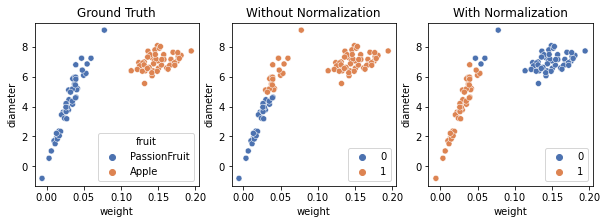

In [11]:
compute_and_plot_clusters(fruit3,cluster_method=cluster.KMeans(n_clusters=2))

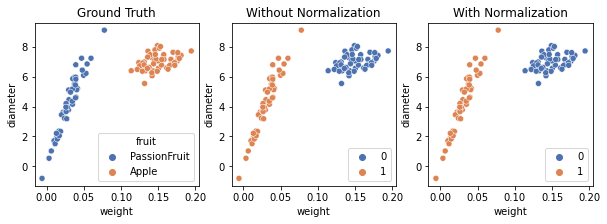

In [12]:
compute_and_plot_clusters(fruit3,cluster_method=BayesianGaussianMixture(n_components=2))

# Example 3
Here both clusters have around the same size, but due to their shapes, it is hard for k-means to separate them with a "circle". Gaussian mixture works

In [13]:
fruit4 = pd.read_csv('data/fruits_all/4-fruitRandom.csv')
fruit4.head(2)

fruit  diameter     weight
0  RedApple  2.208096  51.373585
1  RedApple  1.747354  43.341779

/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


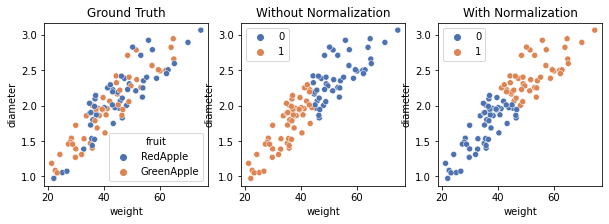

In [14]:
compute_and_plot_clusters(fruit4,cluster_method=cluster.KMeans(n_clusters=2))

/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(
/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


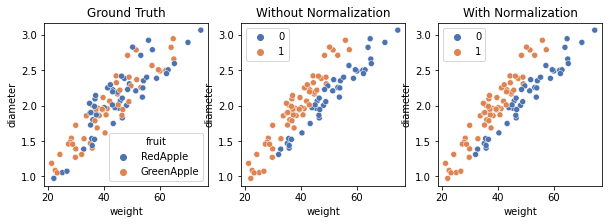

In [15]:
compute_and_plot_clusters(fruit4,cluster_method=BayesianGaussianMixture(n_components=2))

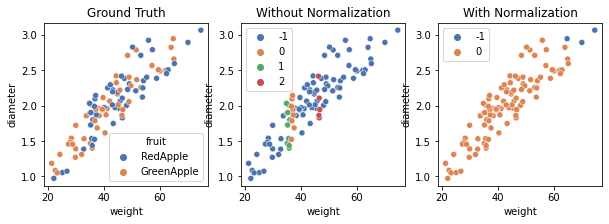

In [16]:
compute_and_plot_clusters(fruit4,cluster_method=DBSCAN(eps=0.5,min_samples=5))

# Example 4
Not much can be done to separate red apples from green apples based on the size... 

We would need some notion of colors to find the ground truth !

However, DBscan with right parameters find a single cluster... Apples

In [17]:
fruit5 = pd.read_csv('data/fruits_all/5-fruitOutlaw.csv')
fruit5.head(2)

fruit  diameter      weight
0   Apple  6.561364  125.936469
1  Cherry  2.977604   82.808008

/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


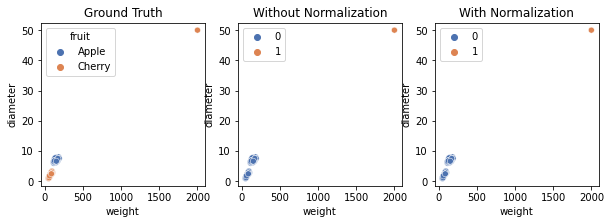

In [18]:
compute_and_plot_clusters(fruit5,cluster_method=cluster.KMeans(n_clusters=2))

/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


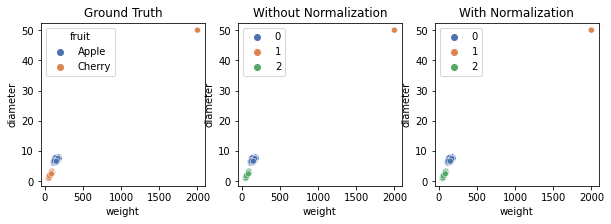

In [19]:
compute_and_plot_clusters(fruit5,cluster_method=cluster.KMeans(n_clusters=3))

## Example 5
Here we observe that with an outlier, the clustering with two clusters fails. We need to set 3 clusters (or, probably better, remove the outlier).

In [20]:
fruit6 = pd.read_csv('data/fruits_all/6-fruitNL.csv')
fruit6.head(2)

fruit    diameter      weight
0  Pumpkin  190.417208  967.882920
1  Pumpkin   60.791210  809.563941

/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


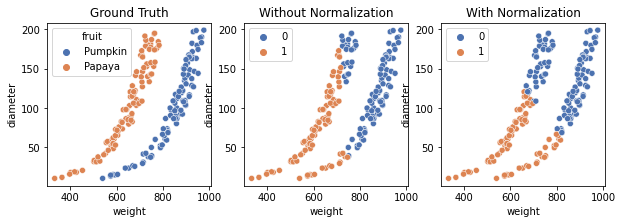

In [21]:
compute_and_plot_clusters(fruit6,cluster_method=cluster.KMeans(n_clusters=2))

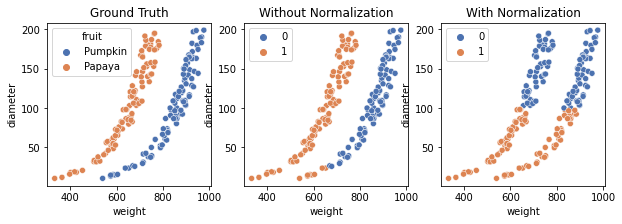

In [22]:
compute_and_plot_clusters(fruit6,cluster_method=BayesianGaussianMixture(n_components=2))

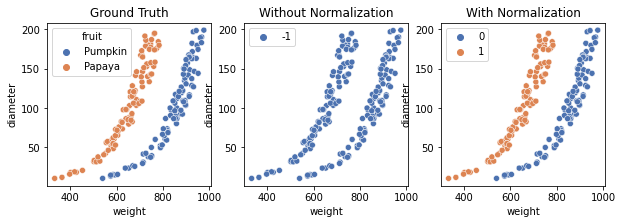

In [23]:
compute_and_plot_clusters(fruit6,cluster_method=DBSCAN(eps=0.43,min_samples=3))

## Example 6
In this example having non-linear clusters, neither k-means or gaussian mixture are adapted to solve the problem fully. DBscan with the appropriate parameters can solve it. 

# Intepreting clusters
We switch back to the synthetica car dataset

In [24]:
cars = pd.read_csv('data/cars_synthetic.csv') 

In [25]:
cars_numeric = cars.copy()
cars_numeric["weight"]=pd.to_numeric(cars_numeric["weight"],errors='coerce')
cars_numeric = cars_numeric[["year","length","width","weight","price"]].dropna()


In [26]:
cars_numeric

year  length     width  weight  price
0    2019    2.96  2.408290  3251.0  11777
1    2010    3.34  2.840680  3277.0   6006
2    2022    2.95  2.084228  3573.0  11925
3    2020    2.89  2.292694  3159.0  10001
4    2013    3.23  2.935223  3791.0   5956
..    ...     ...       ...     ...    ...
995  2023    3.16  2.087509  2739.0  11878
996  2022    3.26  2.202740  3284.0  10195
997  2017    2.88  2.749120  3236.0   6620
998  2021    2.91  2.390186  3139.0   9996
999  2016    3.00  2.487636  2947.0   5002

[899 rows x 5 columns]

In [27]:
clusters = cluster.KMeans(n_clusters=3).fit_predict(cars_numeric)
df_clusters = cars_numeric.copy()
df_clusters["cluster"]=clusters
df_clusters.groupby("cluster").agg(["mean","std","count"])

/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


year                    length                      width  \
                mean       std count      mean        std count      mean   
cluster                                                                     
0        2016.526523  7.655847   509  4.997800  24.598386   509  2.442699   
1        2021.851124  1.114703   356  3.160253   0.179466   356  2.123856   
2        2022.941176  0.238833    34  3.220588   0.189416    34  2.011636   

                              weight                           price  \
              std count         mean         std count          mean   
cluster                                                                
0        0.345468   509  3120.840864  315.419550   509   7688.518664   
1        0.150725   356  3184.727528  307.922409   356  12643.935393   
2        0.086092    34  3210.117647  356.943741    34  21938.588235   

                            
                 std count  
cluster                     
0        1568.517696   509  
1        1833.240621   356  
2        6522.431491    34

In [28]:
#standardize the data
cars_standardized = cars_numeric.copy()
cars_standardized = stats.zscore(cars_standardized)
clusters = cluster.KMeans(n_clusters=3).fit_predict(cars_standardized)
df_clusters["cluster"]=clusters
df_clusters.groupby("cluster").agg(["mean","std","count"])

/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


year                      length                      width  \
                mean       std count        mean        std count      mean   
cluster                                                                       
0        2021.760223  1.035738   538    3.131654   0.228499   538  2.122644   
1        2019.333333  1.154701     3  324.000000  11.135529     3  2.353557   
2        2014.541899  8.361723   358    3.132961   0.243609   358  2.566422   

                              weight                           price  \
              std count         mean         std count          mean   
cluster                                                                
0        0.133396   538  3156.576208  321.362351   538  12230.985130   
1        0.200206     3  3397.000000  306.489804     3   9150.666667   
2        0.339704   358  3136.832402  306.217815   358   7130.969274   

                            
                 std count  
cluster                     
0        3729.464040   538  
1        1005.686001     3  
2        1499.817812   358

In [38]:
cars_cleaned = cars_numeric.copy()
cars_cleaned["length"]=np.where(cars_cleaned["length"]>100,np.nan,cars_cleaned["length"])
cars_cleaned["length"]=np.where(cars_cleaned["length"]<1.5,np.nan,cars_cleaned["length"])
cars_cleaned.dropna(inplace=True)


In [39]:
clusters = cluster.KMeans(n_clusters=3).fit_predict(stats.zscore(cars_cleaned))
df_clusters = cars_cleaned.copy()
df_clusters["cluster"]=clusters
df_clusters.groupby("cluster").agg(["mean","std","count"])

/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


year                    length                     width  \
                mean       std count      mean       std count      mean   
cluster                                                                    
0        2021.275986  1.441608   279  3.305878  0.116371   279  2.175915   
1        2021.420904  1.334108   354  3.005452  0.111355   354  2.161277   
2        2012.854406  9.233398   261  3.142375  0.167921   261  2.620090   

                              weight                           price  \
              std count         mean         std count          mean   
cluster                                                                
0        0.177195   279  3418.584229  225.321671   279  12215.336918   
1        0.158017   354  2947.951977  225.737445   354  11197.604520   
2        0.380708   261  3132.118774  292.551043   261   6687.590038   

                            
                 std count  
cluster                     
0        3614.860301   279  
1        3765.995172   354  
2        1390.166981   261

<Axes: xlabel='length', ylabel='weight'>

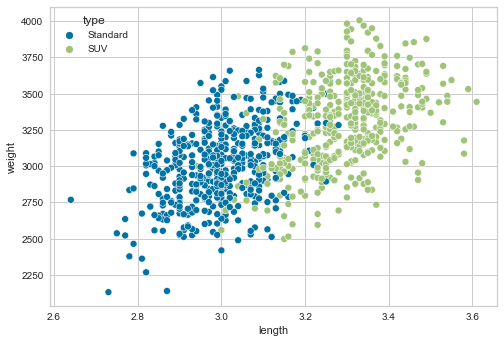

In [40]:
# check the relation with the type variable in the original data
cars_toplot = cars_numeric.copy()
cars_toplot["length"]=np.where(cars_toplot["length"]>100,np.nan,cars_toplot["length"])
cars_toplot["length"]=np.where(cars_toplot["length"]<1.5,np.nan,cars_toplot["length"])
cars_toplot.dropna(inplace=True)
cars_toplot["type"]=cars["type"]
sns.scatterplot(data=cars_toplot, x="length", y="weight", hue="type")

<Axes: xlabel='length', ylabel='weight'>

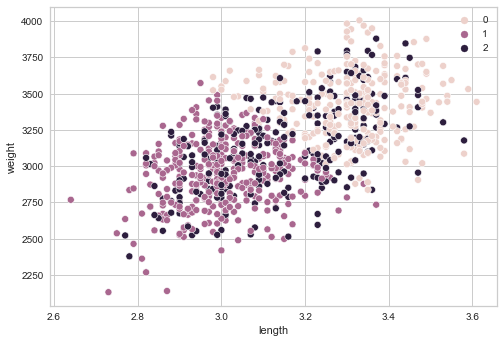

In [41]:
sns.scatterplot(data=df_clusters, x="length", y="weight", hue=clusters)

## Analysis
* If we apply the clustering directly on the original data, the clusters seem to be mostly driven by the prices. This is because the price values are larger than other values. We neverthless observe a cluster of cheap, older, heavier cars, and a smaller cluster of recent, more pensive, shorter cars
* If we normalize the data, we find one cluster of outliers, with only 3 cars having a giant lenght
* If we remove outliers and normalize, we end up with 3 clusters of more equal size, one for old, cheap, heavy, large cars, and then two clusters that differ mostly on their size (weight/length). If we compare these clusters with the type property, we see that our clusters uncovered the distinction between SUV and "normal" cars. Our 3 categories are thus: old cars, and among other, normal and SUV.

/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


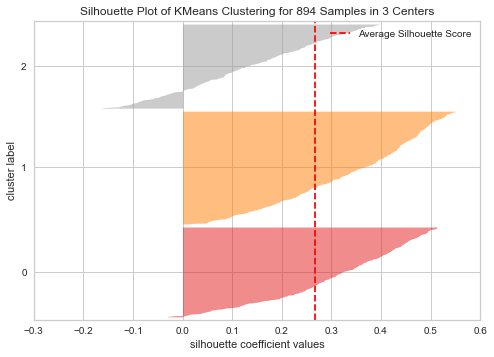

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 894 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [42]:
# use silhouette_visualizer to find the best number of clusters on the cleaned car dataset
from yellowbrick.cluster import SilhouetteVisualizer

km = cluster.KMeans(n_clusters=3)
vzr = SilhouetteVisualizer(km)
vzr.fit(stats.zscore(cars_cleaned))
vzr.poof()

# Analysis
We observe that one of our cluster is quite poorly defined, with many elements having a negative score, i.e., being closer to another cluster than to themselves.

/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/remycazabet/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default 

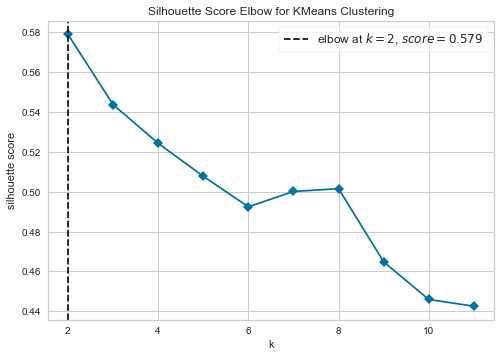

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [43]:
from yellowbrick.cluster import KElbowVisualizer

model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), metric='silhouette', timings=False)

visualizer.fit(cars_cleaned)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

## Analysis
We see that 2 clusters is seen as the best result for silhouette. This is typical of a case in which there are no well-separated clusters. It does not mean that another number of clusters is not relevant. For instance, we see that it seems more relevant to have 3 clusters than 4, so we should keep our cluster number limited. However, if we want more clusters, we have interest to choose 8.